# **Detecting Fake News on Social Media Content - LinkedIN, Twitter, Facebook & Instagram**


---


## Introduction

In today's digital age, social media platforms such as LinkedIn, Twitter, Facebook, and Instagram have become primary sources of information dissemination. While these platforms offer significant benefits in terms of connectivity, communication, and information sharing, they also present substantial challenges, particularly with the proliferation of fake news. The rapid spread of misinformation on social media can have serious repercussions, influencing public opinion, inciting panic, and undermining trust in legitimate news sources.

Detecting fake news on social media is a critical task that involves identifying and curbing the spread of false information. Given the vast amount of content generated daily on platforms like LinkedIn, Twitter, Facebook, and Instagram, manual detection is impractical. Therefore, leveraging advanced computational techniques such as machine learning and natural language processing (NLP) is essential to develop automated and scalable solutions for fake news detection.

## Modelling Approach

In this section we will discuss the approach to create models which will be used to detect fake news that are circulating within the social media platforms. We will discuss how to create a model from scratch which includes data preprocessing, feature engineering, model building, hyperparameter tuning/ fine tuning and data visualization for inputs and outputs.

Lets discuss them in brief:

### 1. Data (Text) Preprocessing:

- Lower Case
- Remove links
- Remove next lines (\n)
- Words containing numbers
- Extra spaces
- Special characters
- Removal of stop words
- Stemming
- Lemmatization

### 2. Feature Engineering:

- Convert the Text corpus to a matrix of word counts (Vectorize the Text data)
  - Eg: Use Tf-IDF

### 3. Model Building:

1. Divide the dataset into Train (70%), Test (20%), and Validation (10%) datasets.
2. Building at least 3 classification models:
   - Logistic Regression
   - LSTM Model
   - BERT-Based model
   - **Step 1:** Build model 1 and generate the classification report (Performance metrics using Confusion Matrix) for both Training and Test datasets.
   - **Step 2: (Hyperparameter Tuning / Fine Tuning)**
     - Use grid search or binary search for Hyperparameter Tuning.
     - Use at least 2 values for each hyperparameter.
     - Choose the best model parameters based on grid search and generate the classification report (Performance metrics using Confusion Matrix) for both Training and Test datasets.
   - **Step 3:** Repeat Step 1 and 2 for Model 2 and Model 3 as well.
   - **Step 4:** Now choose the final model based on the classification report (Performance metrics using Confusion Matrix) for both Training, Test, and Validation datasets.

### 4. Data Visualization:

- Input and Output plots

# **Data** **Preprocessing**

In [72]:
# Importing important libraries for data preprocessing
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/FakeNewsNet/FakeNewsNet.csv')

In [76]:
# Display first 5 rows from the dataset
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [77]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [78]:
# Check if any column contains NaN values
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['news_url', 'source_domain']


In [79]:
# Check the count of NaN values
df.isnull().sum()

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64

In [80]:
# Fill missing values
df['news_url'].fillna('missing url', inplace=True)
df['source_domain'].fillna('missing domain', inplace=True)

In [81]:
df.isnull().sum()

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64

In [82]:
# Initialize necessary tools
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nlp = spacy.load('en_core_web_sm')

# Customize stop words by excluding certain words while keeping important ones
important_words_to_keep = {"not", "no", "never", "can", "could", "will", "would", "shall", "should", "may", "might", "must",
                           "but", "and", "or", "yet", "so",
                           "I", "you", "he", "she", "it", "we", "they",
                           "a", "an", "the", "this", "that", "these", "those",
                           "in", "on", "at", "by", "for", "with", "of", "to"}

custom_stop_words = stop_words - important_words_to_keep

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [83]:
def preprocess_text(text):
    # Lower case
    text = text.lower()

    # Remove links (http, www, https) and ".com"
    text = re.sub(r'http\S+|www\S+|https\S+|\s[A-Za-z]*\.com', '', text, flags=re.MULTILINE)

    # Remove newlines, tabs, and extra spaces
    text = re.sub(r"(\\n|\n|\t|\s\s+)", ' ', text).strip()

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

   # Remove special characters except allowed ones
    allowed_chars = "£$"
    text = re.sub(r"[^a-zA-Z0-9\s" + re.escape(allowed_chars) + "]", '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words and single character tokens
    tokens = [token for token in tokens if token.lower() not in custom_stop_words and len(token) > 1]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]


    return ' '.join(tokens)

In [84]:
# Apply preprocessing to the 'title' column
df['title'] = df['title'].apply(preprocess_text)

In [85]:
# Handle missing values in title column
df['title'].fillna('Missing title', inplace=True)

In [86]:
# Save the preprocessed dataset
df.to_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv', index=False)

In [87]:
# Load and display the preprocessed dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv')
print(df['title'][0])

kandi burruss explodes rape accusation on real housewife of atlanta reunion video


In [88]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,kandi burruss explodes rape accusation on real...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,people choice award the best red carpet look,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,sophia bush sends sweet birthday message to on...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,colombian singer maluma spark rumour of inappr...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,gossip girl year later upper east siders shock...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


# **Logistic** **Redression** **Model**

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [82]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv')

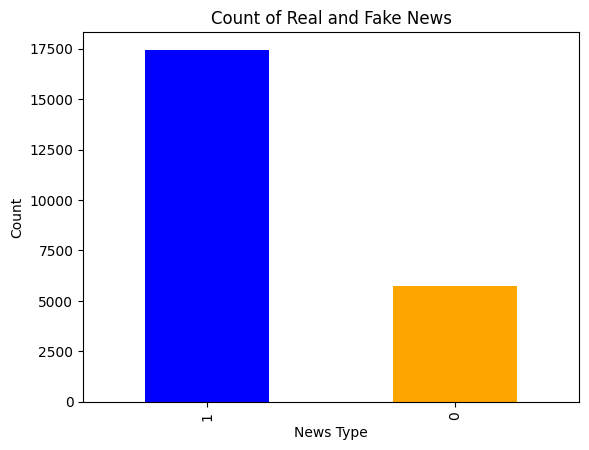

Fake News Count (0): 5755
Real News Count (1): 17441


In [83]:
# Show the count of real and fake news
df['real'].value_counts().plot(kind='bar', color=['blue', 'orange'], title='Count of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

# Print count of real and fake news
# Get the count of 0s and 1s in the 'real' column
count_values = df['real'].value_counts()

# Print the counts with labels
fake_count = count_values[0]  # Count of fake news
real_count = count_values[1]  # Count of real news

print(f"Fake News Count (0): {fake_count}")
print(f"Real News Count (1): {real_count}")

In [84]:
# Handle any missing values in title column
df['title'].fillna("Unknown Title", inplace=True)

In [85]:
# Combine text features into one column
X = df['title'] + ' ' + df['news_url'] + ' ' + df['source_domain']
y = df['real']

In [86]:
# Split data into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# Further split temp into test (20%) and validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=101)

In [87]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

In [88]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_vec_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

In [89]:
# Define a basic logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled training data
model.fit(X_train_vec_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [90]:
train_score = model.score(X_train_vec_smote, y_train_smote)
val_score = model.score(X_val_vec, y_val)
test_score = model.score(X_test_vec, y_test)

print("Train Score:", train_score)
print("Validation Score:", val_score)
print("Test Score:", test_score)

Train Score: 0.9815953434989343
Validation Score: 0.959879206212252
Test Score: 0.9575522516698988


In [91]:
print(f"Number of iterations to converge: {model.n_iter_}")

Number of iterations to converge: [75]


Validation Accuracy (LR Model): 0.959879206212252
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       590
           1       0.97      0.98      0.97      1728

    accuracy                           0.96      2318
   macro avg       0.95      0.94      0.95      2318
weighted avg       0.96      0.96      0.96      2318



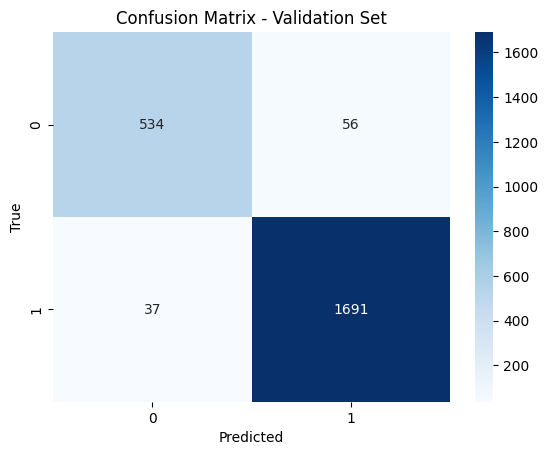

In [92]:
# Validate the logistic regression model
val_predictions = model.predict(X_val_vec)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy (LR Model):", val_accuracy)
print(classification_report(y_val, val_predictions))

# Confusion matrix for validation set
val_cm = confusion_matrix(y_val, val_predictions)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test Accuracy (LR Model): 0.9575522516698988
Test ROC-AUC Score (LR Model): 0.9872634156078111
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1126
           1       0.97      0.97      0.97      3515

    accuracy                           0.96      4641
   macro avg       0.94      0.94      0.94      4641
weighted avg       0.96      0.96      0.96      4641



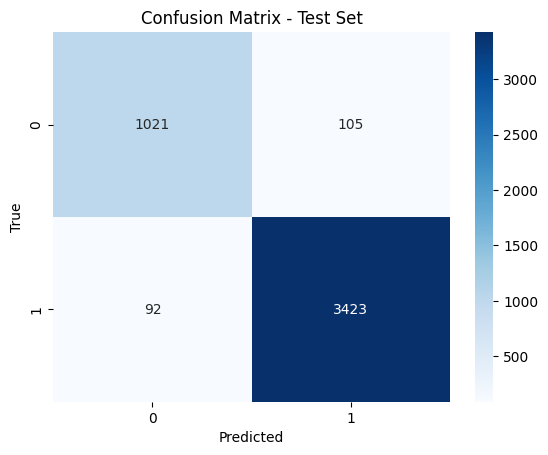

In [93]:
# Test the logistic regression model
test_predictions = model.predict(X_test_vec)
test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_vec)[:, 1])
print("Test Accuracy (LR Model):", test_accuracy)
print("Test ROC-AUC Score (LR Model):", test_roc_auc)
print(classification_report(y_test, test_predictions))

# Confusion matrix for test set
val_cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Hyperparameter tuning on Logistic Regression Model

In [94]:
# Define the parameters for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'newton-cg']  # Optimization algorithms
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=100000, random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)  # Use all available CPU cores

In [95]:
# Perform grid search on the training data
grid_search.fit(X_train_vec_smote, y_train_smote)  # Use resampled training data for grid search

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10.0, 'solver': 'liblinear'}


Validation Accuracy (Tuned LR Model): 0.9810181190681622
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       590
           1       0.98      0.99      0.99      1728

    accuracy                           0.98      2318
   macro avg       0.98      0.97      0.97      2318
weighted avg       0.98      0.98      0.98      2318



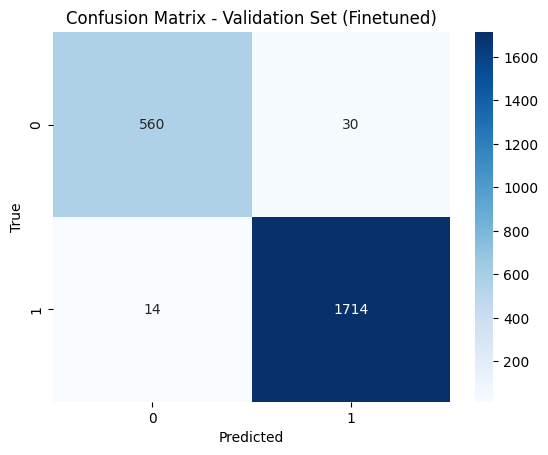

In [96]:
# Evaluate the model with best parameters on the validation set
best_model = grid_search.best_estimator_
val_predictions_tuned = best_model.predict(X_val_vec)
val_accuracy_tuned = accuracy_score(y_val, val_predictions_tuned)
print("Validation Accuracy (Tuned LR Model):", val_accuracy_tuned)
print(classification_report(y_val, val_predictions_tuned))

# Confusion matrix for validation set (Best Parameters)
val_cm = confusion_matrix(y_val, val_predictions_tuned)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set (Finetuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Test Accuracy (Tuned LR Model): 0.9816849816849816
Test ROC-AUC Score (Tuned LR Model): 0.9944101528844914
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1126
           1       0.99      0.99      0.99      3515

    accuracy                           0.98      4641
   macro avg       0.98      0.97      0.97      4641
weighted avg       0.98      0.98      0.98      4641



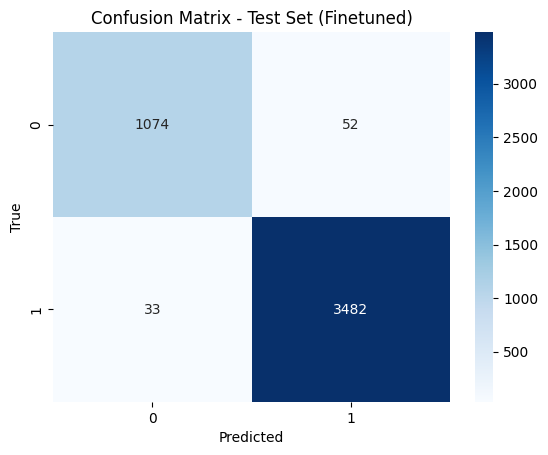

In [97]:
# Evaluate the model with best parameters on the test set
test_predictions_tuned = best_model.predict(X_test_vec)
test_accuracy_tuned = accuracy_score(y_test, test_predictions_tuned)
test_roc_auc_tuned = roc_auc_score(y_test, best_model.predict_proba(X_test_vec)[:, 1])
print("Test Accuracy (Tuned LR Model):", test_accuracy_tuned)
print("Test ROC-AUC Score (Tuned LR Model):", test_roc_auc_tuned)
print(classification_report(y_test, test_predictions_tuned))

# Confusion matrix for test set (Best Parameters)
val_cm = confusion_matrix(y_test, test_predictions_tuned)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set (Finetuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [98]:
# Predict custom input
custom_input = "gwen stefani got dumped by blake shelton jealousy and drama exclusive"
vectorized_input = vectorizer.transform([custom_input])
prediction = best_model.predict(vectorized_input)

# Print prediction result
print("Prediction for custom input:", "Real" if prediction[0] == 1 else "Fake")

Prediction for custom input: Fake


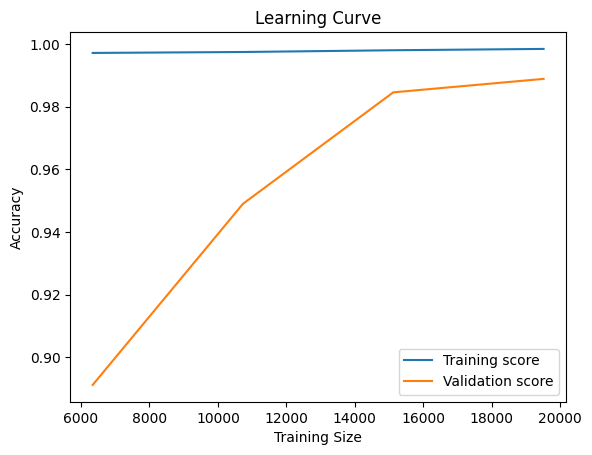

In [99]:
# Plot training vs validation score
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_vec_smote, y_train_smote, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# **BERT** **based** **Model**

In [ ]:
# Install transformers library if not already installed
!pip install transformers

import torch
from transformers import DistilBertTokenizer, DistilBertModel, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from transformers import DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

In [ ]:
# Load DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Tokenize text data
def tokenize_text(texts, max_length):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
                            text,                      # Text to encode
                            add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                            max_length = max_length,   # Pad & truncate all sentences
                            pad_to_max_length = True,
                            return_attention_mask = True,  # Construct attn. masks
                            return_tensors = 'pt'      # Return pytorch tensors
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

# Set maximum sequence length
max_length = 128

In [ ]:
# Tokenize and encode training, validation, and test data
X_train_input_ids, X_train_attention_masks = tokenize_text(X_train, max_length)
X_val_input_ids, X_val_attention_masks = tokenize_text(X_val, max_length)
X_test_input_ids, X_test_attention_masks = tokenize_text(X_test, max_length)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Load pre-trained DistilBERT model
model_bert = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',  # Use pre-trained model
    num_labels = 2,             # Binary classification (fake vs real news)
    output_attentions = False,  # Do not return attentions weights
    output_hidden_states = False  # Do not return all hidden-states
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define optimizer and learning rate scheduler
optimizer = AdamW(model_bert.parameters(), lr=2e-5, eps=1e-8)
epochs = 3
total_steps = len(X_train_input_ids) * epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,  # Default value
    num_training_steps = total_steps
)

# Prepare DataLoader for training
batch_size = 32

train_data = TensorDataset(X_train_input_ids, X_train_attention_masks, torch.tensor(y_train.values))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_bert.to(device)

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')
    print('-' * 10)

    model_bert.train()

    total_loss = 0

    for batch in train_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_attention_masks = batch[1].to(device)
        batch_labels = batch[2].to(device)

        model_bert.zero_grad()

        outputs = model_bert(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_masks,
            labels=batch_labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model_bert.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Average Training Loss: {avg_train_loss}')


Epoch 1/3
----------
Average Training Loss: 0.07509237988787798
Epoch 2/3
----------
Average Training Loss: 0.021763550267427864
Epoch 3/3
----------
Average Training Loss: 0.011368377728684022


In [ ]:
# Evaluation on validation set
model_bert.eval()

val_data = TensorDataset(X_val_input_ids, X_val_attention_masks, torch.tensor(y_val.values))
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

predictions, true_labels = [], []

for batch in val_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_attention_masks = batch[1].to(device)
    batch_labels = batch[2]

    with torch.no_grad():
        outputs = model_bert(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_masks
        )

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()

    predictions.extend(np.argmax(logits, axis=1))
    true_labels.extend(batch_labels.numpy())

In [ ]:
# Calculate accuracy and other metrics
val_accuracy_bert = accuracy_score(true_labels, predictions)
#val_roc_auc_bert = roc_auc_score(true_labels, logits[:, 1])
print(f"Validation Accuracy (BERT Model): {val_accuracy_bert}")
#print(f"Validation ROC-AUC Score (BERT Model): {val_roc_auc_bert}")
print(classification_report(true_labels, predictions))

Validation Accuracy (BERT Model): 0.99137187230371
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       557
           1       0.99      1.00      0.99      1761

    accuracy                           0.99      2318
   macro avg       0.99      0.98      0.99      2318
weighted avg       0.99      0.99      0.99      2318



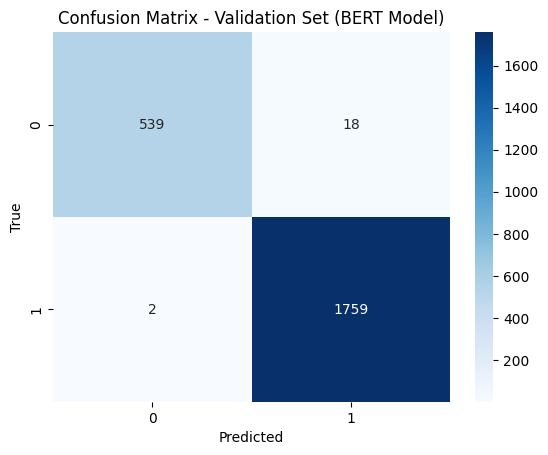

In [ ]:
# Confusion matrix for validation set (BERT Model)
val_cm_bert = confusion_matrix(true_labels, predictions)
sns.heatmap(val_cm_bert, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set (BERT Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Evaluation on test set
test_data = TensorDataset(X_test_input_ids, X_test_attention_masks, torch.tensor(y_test.values))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

predictions_test, true_labels_test = [], []

for batch in test_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_attention_masks = batch[1].to(device)
    batch_labels = batch[2]

    with torch.no_grad():
        outputs = model_bert(
            input_ids=batch_input_ids,
            attention_mask=batch_attention_masks
        )

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()

    predictions_test.extend(np.argmax(logits, axis=1))
    true_labels_test.extend(batch_labels.numpy())

In [ ]:
# Calculate accuracy and other metrics
test_accuracy_bert = accuracy_score(true_labels_test, predictions_test)
#test_roc_auc_bert = roc_auc_score(true_labels_test, logits[:, 1])
print(f"Test Accuracy (BERT Model): {test_accuracy_bert}")
#print(f"Test ROC-AUC Score (BERT Model): {test_roc_auc_bert}")
print(classification_report(true_labels_test, predictions_test))

Test Accuracy (BERT Model): 0.9941810344827586
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1144
           1       0.99      1.00      1.00      3496

    accuracy                           0.99      4640
   macro avg       0.99      0.99      0.99      4640
weighted avg       0.99      0.99      0.99      4640



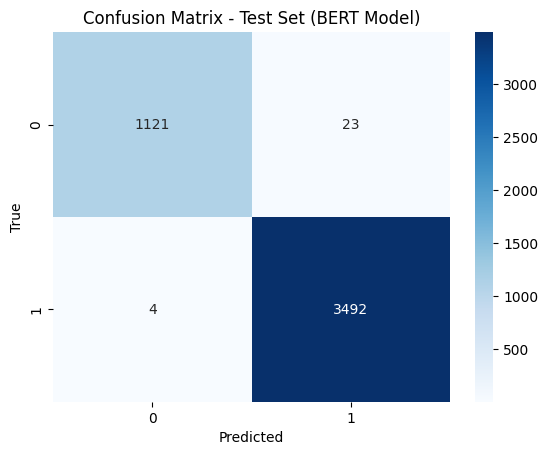

In [ ]:
# Confusion matrix for test set (BERT Model)
test_cm_bert = confusion_matrix(true_labels_test, predictions_test)
sns.heatmap(test_cm_bert, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set (BERT Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **LSTM** **Model**

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Bidirectional, SpatialDropout1D
from keras.optimizers import Adam

In [ ]:
# Tokenize text data
tokenizer_lstm = Tokenizer()
tokenizer_lstm.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer_lstm.texts_to_sequences(X_train)
X_val_seq = tokenizer_lstm.texts_to_sequences(X_val)
X_test_seq = tokenizer_lstm.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
max_seq_length = 128  # Max sequence length to pad

X_train_seq_padded = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_val_seq_padded = pad_sequences(X_val_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [ ]:
# Define LSTM model architecture with bidirectional layer and dropout
lstm_model = Sequential()
lstm_model.add(Embedding(len(tokenizer_lstm.word_index) + 1, 128, input_length=max_seq_length))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 128)          3648640   
                                                                 
 spatial_dropout1d (Spatial  (None, 128, 128)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3912065 (14.92 MB)
Trainable params: 3912065 (14.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Train the LSTM model
epochs_lstm = 5
batch_size_lstm = 32

history_lstm = lstm_model.fit(X_train_seq_padded, y_train, epochs=epochs_lstm, batch_size=batch_size_lstm,
                              validation_data=(X_val_seq_padded, y_val), verbose=1)

Epoch 1/5
508/508 [==============================] - 461s 908ms/step - loss: 0.0322 - accuracy: 0.9914 - val_loss: 0.0573 - val_accuracy: 0.9836
Epoch 2/5
508/508 [==============================] - 449s 885ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.1177 - val_accuracy: 0.9737
Epoch 3/5
508/508 [==============================] - 447s 881ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.1136 - val_accuracy: 0.9780
Epoch 4/5
508/508 [==============================] - 455s 895ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0775 - val_accuracy: 0.9797
Epoch 5/5
508/508 [==============================] - 448s 881ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1038 - val_accuracy: 0.9814


In [ ]:
# Evaluate on validation set
val_loss_lstm, val_accuracy_lstm = lstm_model.evaluate(X_val_seq_padded, y_val, verbose=0)
print(f"Validation Accuracy (LSTM Model): {val_accuracy_lstm}")

Validation Accuracy (LSTM Model): 0.981449544429779


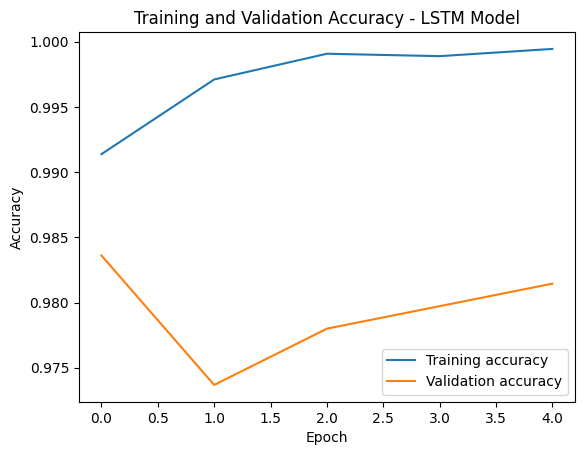

In [ ]:
# Plot training history
plt.plot(history_lstm.history['accuracy'], label='Training accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy - LSTM Model')
plt.legend()
plt.show()

In [ ]:
# Evaluate on test set
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(X_test_seq_padded, y_test, verbose=0)
print(f"Test Accuracy (LSTM Model): {test_accuracy_lstm}")

Test Accuracy (LSTM Model): 0.9864224195480347


In [ ]:
# Make predictions on test set
predictions_lstm_prob = lstm_model.predict(X_test_seq_padded)
predictions_lstm = (predictions_lstm_prob > 0.5).astype('int32')  # Threshold of 0.5 for binary classification

# Convert to 1D array (if necessary)
predictions_lstm = predictions_lstm.flatten()

# Print classification report
print(classification_report(y_test, predictions_lstm))

145/145 [==============================] - 13s 91ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1144
           1       0.99      0.99      0.99      3496

    accuracy                           0.99      4640
   macro avg       0.98      0.98      0.98      4640
weighted avg       0.99      0.99      0.99      4640



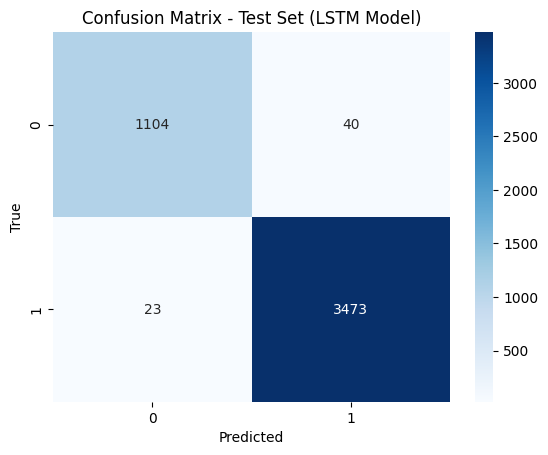

In [ ]:
# Confusion matrix for test set (LSTM Model)
test_cm_lstm = confusion_matrix(y_test, predictions_lstm)
sns.heatmap(test_cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set (LSTM Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()